# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from collections import Counter
from Bio import Entrez

# Importing shifted wobble dataset

In [3]:
all_RMSD = pd.read_excel('wobbles.xlsx', sheet_name='Table 3')


#importing dataset of all shifted wobble
sw_df = pd.read_excel('wobbles.xlsx', sheet_name='Table 1')

#filtering out the redundant ones (non-representative ones)
sw_df1= sw_df[sw_df['representative']==1]
sw_df1.index= np.arange(0, len(sw_df1))

In [4]:
#all_sw= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/get_all_RNA/new_data_April_2023/2nd_version_algorithm_removing_redundancy/anionic_GU_pipeline/anionic_GU_pipeline_updated/identifying_shifted_wobbles/identify_shifted_wobble/scripts/reg_3_nr_8_NOV2024.csv')

In [5]:
sw_df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'PDB_ID', 'Experimental_Method',
       'Resolution_(√Ö)', 'chain_ID', 'seg_ID', 'Source_Organism_chain',
       'Molecule', 'Source_Organism_all',
       ...
       'U_O4_interactions_range', 'Median_map_model_cc', 'Mean_map_model_cc',
       'Raw_map_model_cc_for_the_G', 'Normalized_map_model_cc_for_the_G',
       'Percentile_cc_for_the_G', 'Raw_map_model_cc_for_the_U',
       'Normalized_map_model_cc_for_the_U', 'Percentile_cc_for_the_U',
       'cluster'],
      dtype='object', length=120)

In [6]:
#all_RMSD= pd.read_csv('/Users/sharear/Documents/sky/RESEARCH_&_GRAD_SCHOOL/Penn_State/anionic_G_U/get_all_RNA/new_data_April_2023/2nd_version_algorithm_removing_redundancy/anionic_GU_pipeline/anionic_GU_pipeline_updated/identifying_shifted_wobbles/analysis/test_structures/AB_not_equql_BA/all_against_all_RMSD_non_red_shifted_wobbles.csv')

In [7]:
sw_names= [j.rstrip('.cif') for i,j in enumerate(list(all_RMSD.columns)[1:])]

all_RMSD1= all_RMSD.drop(['#'], axis=1)
all_RMSD1.shape

(41, 41)

In [8]:
def get_lineage_dict(org_name):
    def get_tax_id(organism_name):
        handle = Entrez.esearch(db="taxonomy", term=organism_name)
        record = Entrez.read(handle)
        handle.close()
        return record["IdList"][0] if record["IdList"] else None
    
    def get_lineage(tax_id):
        handle = Entrez.efetch(db="taxonomy", id=tax_id, retmode="xml")
        record = Entrez.read(handle)
        handle.close()
        lineage = record[0]["LineageEx"]
        return [taxon["ScientificName"] for taxon in lineage]
    
    tax_ids = [get_tax_id(org) for org in org_name]
    lineages = [get_lineage(tax_id) for tax_id in tax_ids]
    lineage_dict= {}
    for org, lin in zip(org_name, lineages):
        lineage_dict[org]= lin
        
    return lineage_dict

#def get_tax_id(organism_name):
#    handle = Entrez.esearch(db="taxonomy", term=organism_name)
#    record = Entrez.read(handle)
#    handle.close()
#    return record["IdList"][0] if record["IdList"] else None

# List of organisms
org_name= sw_df1['Source_Organism_chain'].to_list()
print (org_name)

lineage_dict= get_lineage_dict(org_name)
print (lineage_dict)

# Fetch TaxIDs
#tax_ids = [get_tax_id(org) for org in org_name]
#print(tax_ids)

['Acinetobacter baumannii', 'Acinetobacter baumannii', 'Bacillus subtilis', 'Escherichia coli', 'Escherichia coli', 'Listeria monocytogenes', 'Mycobacterium tuberculosis', 'Pseudomonas aeruginosa', 'Pseudomonas aeruginosa', 'Staphylococcus aureus', 'Staphylococcus aureus', 'Thermus thermophilus', 'Thermus thermophilus', 'Encephalitozoon cuniculi', 'Leishmania donovani', 'Bacillus subtilis', 'Enterococcus faecalis', 'Escherichia coli', 'Haloarcula marismortui', 'Listeria monocytogenes', 'Mycobacterium tuberculosis', 'Mycobacterium tuberculosis', 'Mycolicibacterium smegmatis', 'Pseudomonas aeruginosa', 'Spinacia oleracea', 'Staphylococcus aureus', 'Staphylococcus aureus', 'Staphylococcus aureus', 'Staphylococcus aureus', 'Thermococcus kodakarensis', 'Thermus thermophilus', 'Saccharomyces cerevisiae', 'Saccharomyces cerevisiae', 'Solanum lycopersicum', 'Drosophila melanogaster', 'Drosophila melanogaster', 'Homo sapiens', 'Oryctolagus cuniculus', 'Schizosaccharomyces pombe', 'Spraguea loph

/Users/sharear/anaconda3/lib/python3.11/site-packages/Bio/Entrez/__init__.py:694: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


{'Acinetobacter baumannii': ['cellular organisms', 'Bacteria', 'Pseudomonadati', 'Pseudomonadota', 'Gammaproteobacteria', 'Moraxellales', 'Moraxellaceae', 'Acinetobacter', 'Acinetobacter calcoaceticus/baumannii complex'], 'Bacillus subtilis': ['cellular organisms', 'Bacteria', 'Bacillati', 'Bacillota', 'Bacilli', 'Bacillales', 'Bacillaceae', 'Bacillus', 'Bacillus subtilis group'], 'Escherichia coli': ['cellular organisms', 'Bacteria', 'Pseudomonadati', 'Pseudomonadota', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Escherichia'], 'Listeria monocytogenes': ['cellular organisms', 'Bacteria', 'Bacillati', 'Bacillota', 'Bacilli', 'Bacillales', 'Listeriaceae', 'Listeria'], 'Mycobacterium tuberculosis': ['cellular organisms', 'Bacteria', 'Bacillati', 'Actinomycetota', 'Actinomycetes', 'Mycobacteriales', 'Mycobacteriaceae', 'Mycobacterium', 'Mycobacterium tuberculosis complex'], 'Pseudomonas aeruginosa': ['cellular organisms', 'Bacteria', 'Pseudomonadati', 'Pseudomonadota'

In [65]:
#def get_lineage(tax_id):
#    handle = Entrez.efetch(db="taxonomy", id=tax_id, retmode="xml")
#    record = Entrez.read(handle)
#    handle.close()
#    lineage = record[0]["LineageEx"]
#    return [taxon["ScientificName"] for taxon in lineage]

# Fetch lineages
#lineages = [get_lineage(tax_id) for tax_id in tax_ids]
#lineage_dict= {}
#for org, lin in zip(org_name, lineages):
#    lineage_dict[org]= lin
    
    #print(f"{org}: {lin}")
#print (lineage_dict)

In [9]:
#all_nr_sw= all_sw[all_sw['representative']==1]
#all_nr_sw.index= np.arange(0, len(all_nr_sw))
cor_sw_names= []
sw_df1["chain_ID"] = sw_df1["chain_ID"].astype(str)

for ind, name in enumerate(sw_names):
    n_name= name.replace('-', '_')
    pdb= name.split('_')[0]
    chain= str(name.split('_')[1])
    print (n_name)
    print (pdb)
    print (chain)
    
    ddd= sw_df1[(sw_df1['PDB_ID']== pdb) & (sw_df1['chain_ID']== chain)]
    #print (ddd['Source_Organism_chain'].to_list())
    ddd.index= np.arange(0, len(ddd))
    #print ((ddd['Source_Organism_chain'].to_list()[0]).split(' ')[0][0])
    org_ID= (ddd['Source_Organism_chain'].to_list()[0]).split(' ')[0][0]+(ddd['Source_Organism_chain'].to_list()[0]).split(' ')[1][:2]
    #print (org_ID)
    
    n_name= org_ID+ '_'+ n_name+ '_'+ lineage_dict[ddd['Source_Organism_chain'].to_list()[0]][1]
    ##print (n_name)
    cor_sw_names.append(n_name)

7UNU_a_U1080_a_G1093
7UNU
a
4V8I_AA_U677_AA_G713
4V8I
AA
7QEP_3_U556_3_G592
7QEP
3
7R7A_1_U441_1_G493
7R7A
1
6XU8_A5_U1198_A5_G1312
6XU8
A5
7NHN_A_G2337_A_U2345
7NHN
A
4U3N_1_U2875_1_G2952
4U3N
1
7ZTA_16S1_U1086_16S1_G1099
7ZTA
16S1
7U2H_1A_G2304_1A_U2312
7U2H
1A
7ASN_A_G2133_A_U2211
7ASN
A
4B3R_A_U1086_A_G1099
4B3R
A
7QIW_2_G424_2_U643
7QIW
2
5MMI_A_G394_A_U404
5MMI
A
8B0X_A_U677_A_G713
8B0X
A
7MT7_A_G2542_A_U2550
7MT7
A
5NGM_AA_G428_AA_U438
5NGM
AA
6SKF_BA_G1015_BA_U1024
6SKF
BA
6YEF_a_U1097_a_G1110
6YEF
a
6YEF_a_U685_a_G721
6YEF
a
7S0S_C_G470_C_U480
7S0S
C
6LU8_2_G505_2_U653
6LU8
2
7MT7_a_U668_a_G704
7MT7
a
6WQN_1_G1515_1_U1565
6WQN
1
6HA1_A_G2130_A_U2217
6HA1
A
7UNR_a_U671_a_G707
7UNR
a
7QCA_S60_U998_S60_G1050
7QCA
S60
7NHN_a_U687_a_G723
7NHN
a
6XU8_A5_G2811_A5_U3128
6XU8
A5
6W6P_A_G2318_A_U2326
6W6P
A
7M4Y_a_U1083_a_G1096
7M4Y
a
6HA1_a_U686_a_G722
6HA1
a
7UVZ_a_U674_a_G710
7UVZ
a
3CXC_0_U2586_0_G2592
3CXC
0
7MT2_A_G471_A_U481
7MT2
A
5T2A_2_G2006_2_U2022
5T2A
2
6WRU_1_G1577_1_U1589

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_9195/2013336099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_df1["chain_ID"] = sw_df1["chain_ID"].astype(str)


In [10]:
all_RMSD1.index= cor_sw_names
all_RMSD1.columns= cor_sw_names

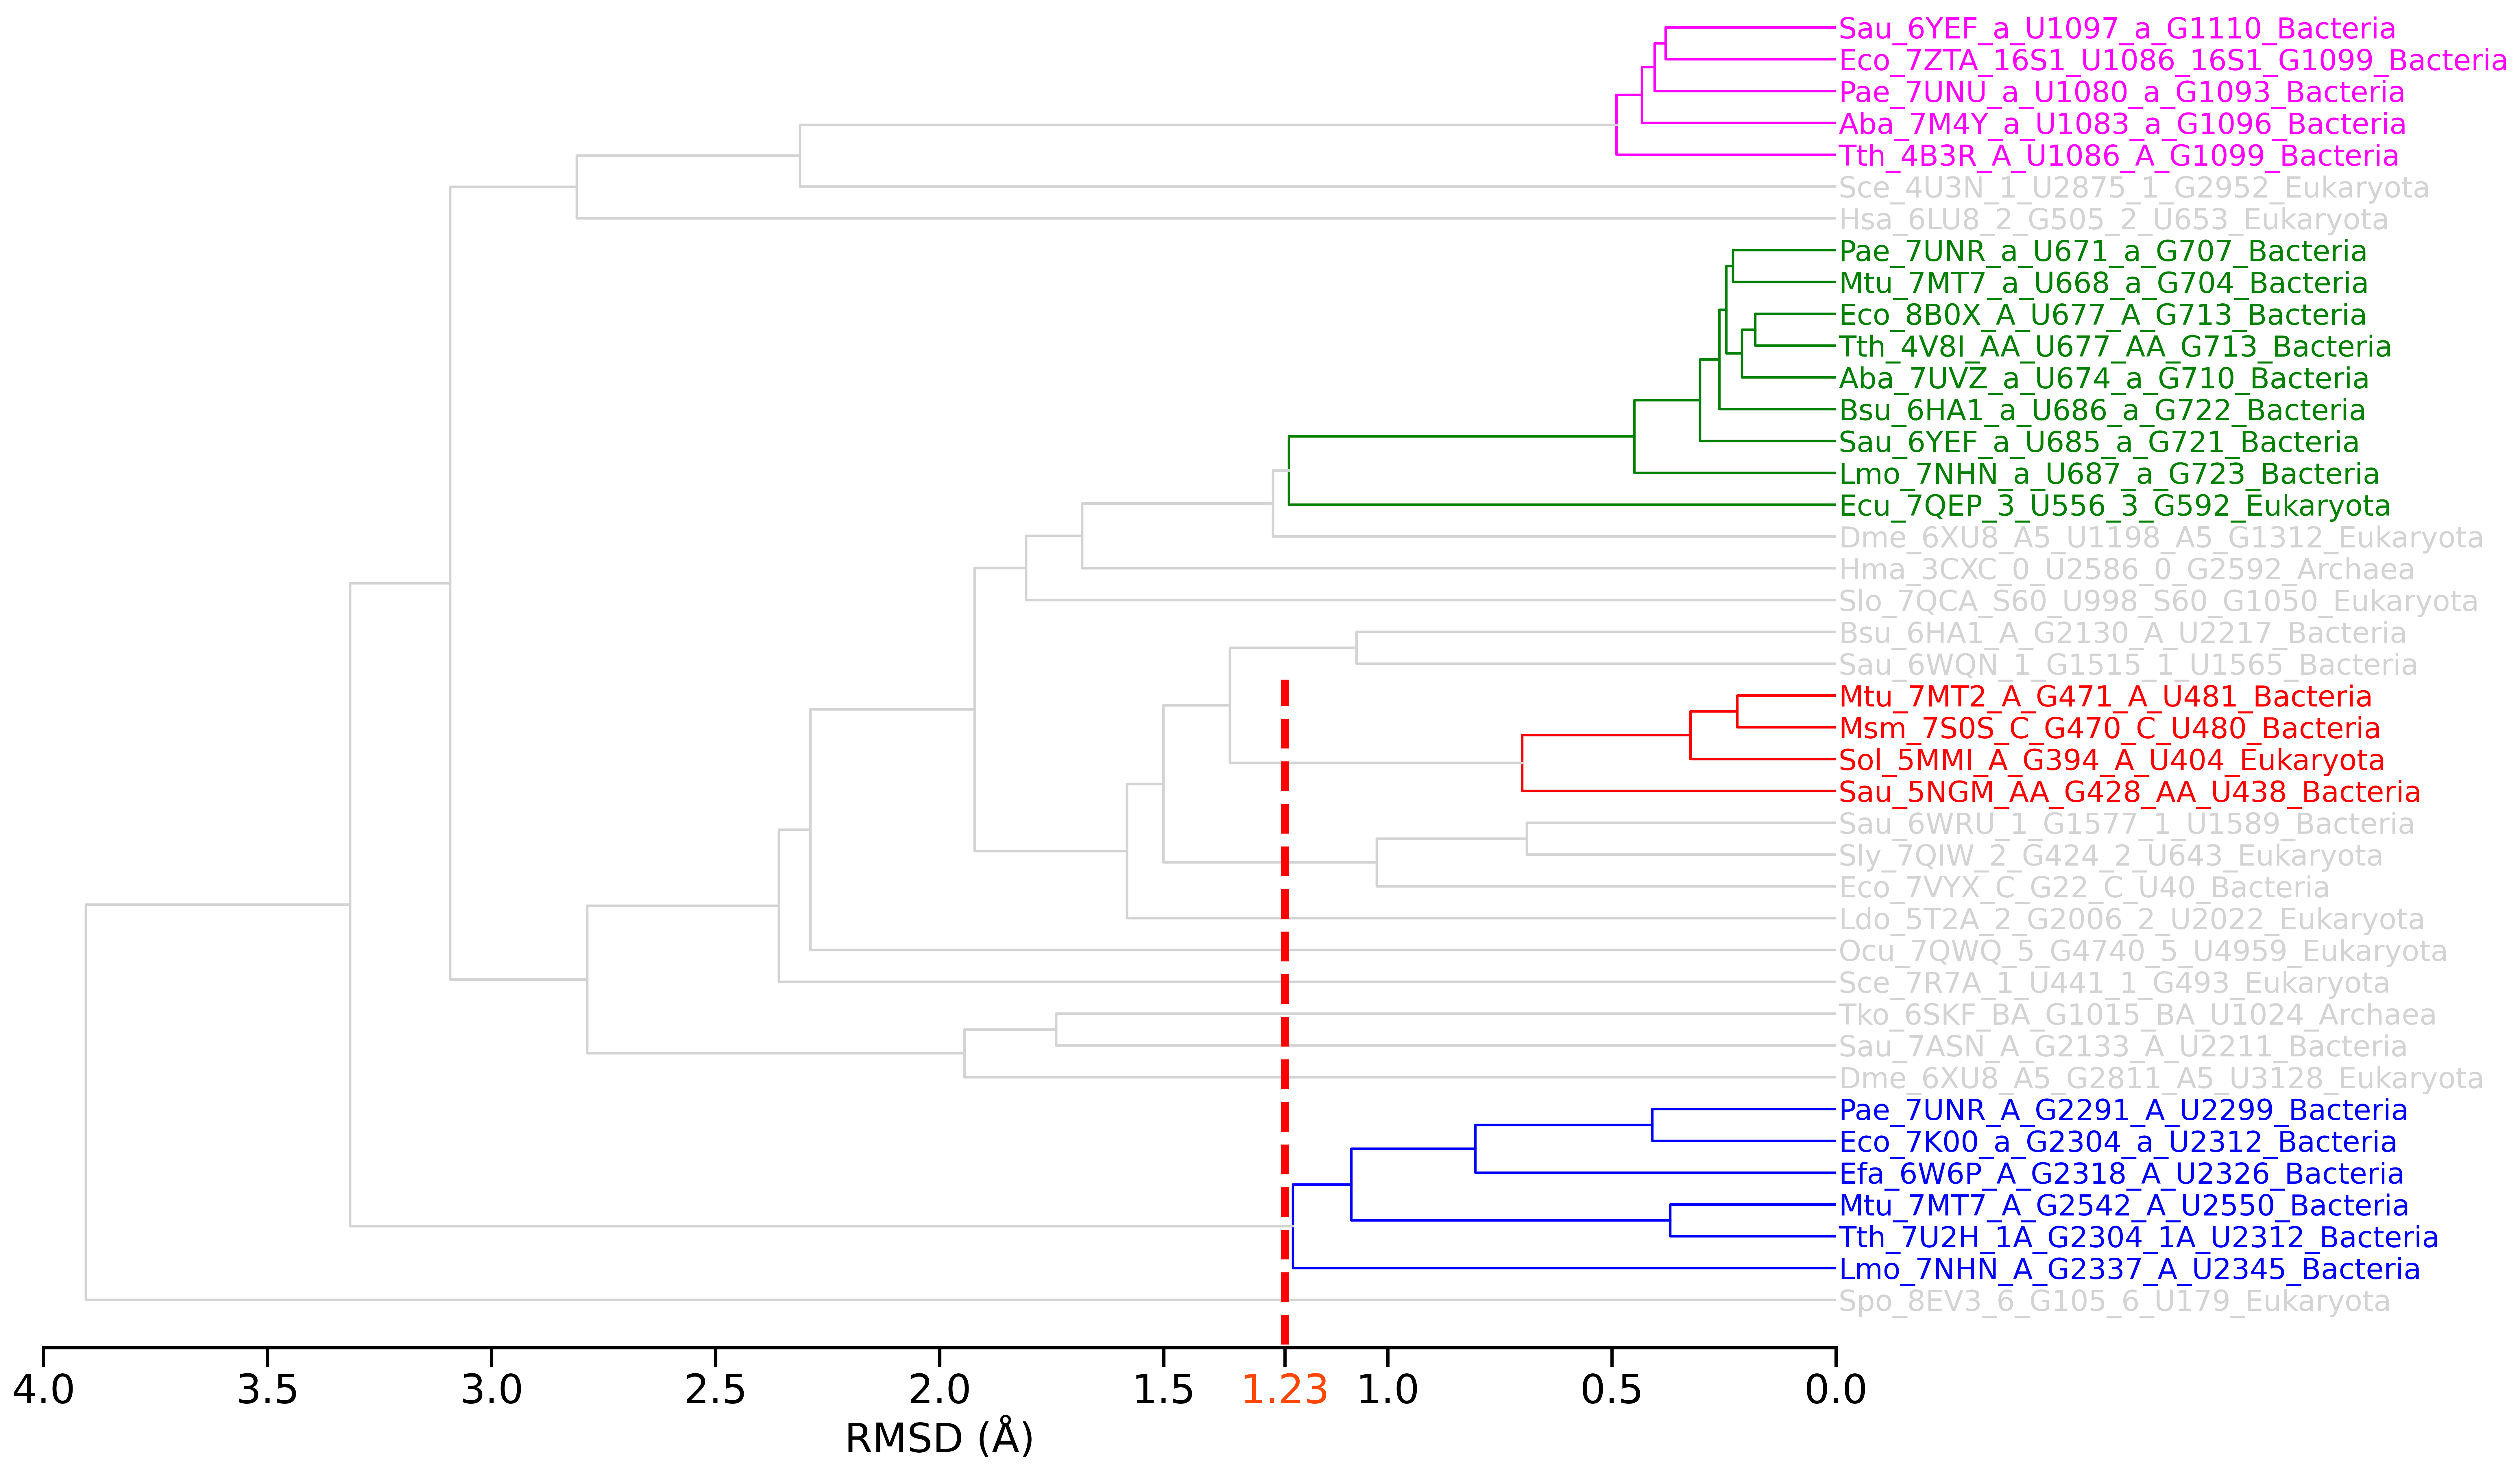

In [17]:
# Convert DataFrame to squareform distance matrix
rmsd_matrix = squareform(all_RMSD1.values)

# Perform hierarchical clustering
linkage_matrix = linkage(rmsd_matrix, method='average')

dend = dendrogram(linkage_matrix, color_threshold= 1.23, labels=all_RMSD1.index, above_threshold_color='lightgray', leaf_rotation=0, orientation='left', no_plot=True)

color_list_counter=  dict(Counter(dend['color_list']))
lcolor_list_counter=  dict(Counter(dend['leaves_color_list']))

small_clusters=[] #clusters with less than 4 members will be stored here

for i in lcolor_list_counter:
    if i != 'lightgray' and lcolor_list_counter[i]<4:
        small_clusters.append(i)

color_list_n= [] #updated color list for the branches
leaves_color_list_n= [] #updated color list for the branch leaves

for i, cls in enumerate(dend['color_list']):
    if cls in small_clusters:
        color_list_n.append('lightgray')
    else:
        if cls =='C1':
            color_list_n.append('b')
        elif cls =='C3':
            color_list_n.append('r')
        elif cls =='C5':
            color_list_n.append('g')
        elif cls =='C6':
            color_list_n.append('magenta')
        elif cls =='lightgray':
            color_list_n.append('lightgray')

for i, ls in enumerate(dend['leaves_color_list']):
    if ls in small_clusters:
      leaves_color_list_n.append('lightgray')
    else:
        if ls =='C1':
            leaves_color_list_n.append('b')
        elif ls =='C3':
            leaves_color_list_n.append('r')
        elif ls =='C5':
            leaves_color_list_n.append('g')
        elif ls =='C6':
            leaves_color_list_n.append('magenta')
        elif ls =='lightgray':
            leaves_color_list_n.append('lightgray')

dend["color_list"]= color_list_n #updated branch color list is assigned to the original dendrogram
dend["leaves_color_list"]= leaves_color_list_n #updated leaves color list is assigned to the original dendrogram

#Re-ploting the dendrogram with the updated colors
plt.figure(figsize=(20, 15), dpi = 400)

#in the dendrogram below the color trashhold is set 0 so that color can be applied 
#to the clusters identified in the dendrogram above for the same data
dend1= dendrogram(linkage_matrix, color_threshold= 0, above_threshold_color='lightgray', leaf_rotation=0, leaf_font_size=18, orientation='left', labels=all_RMSD1.index)

#assigning branch color
for i, dcoord in enumerate(dend['dcoord']):
    plt.plot(dcoord, dend['icoord'][i], color=dend['color_list'][i])

#assigning branch leaves color
for leaf, leaf_color in zip(plt.gca().get_yticklabels(), dend["leaves_color_list"]):
    leaf.set_color(leaf_color)

#assigning locations for xticks
ticks_loc=[0.0, 0.5, 1.0, 1.23, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
plt.xticks(ticks_loc, fontsize = 25)
plt.xlim(4.0, 0.0)

ticks_labels = ['0.0', '0.5', '1.0', '1.23', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']
plt.gca().set_xticklabels(ticks_labels)

#updating xtick and ytick parameters
plt.tick_params(axis='y', which='both', length= -2)
plt.tick_params(axis='x', width=2, length= 12)

#ticks = plt.gca().get_xticklabels()
#xticks = plt.gca().get_xticks()
#xticklabels = plt.gca().get_xticklabels()
#for tick in ticks:
#    if tick.get_text() == '1.23':  #highlighting the color treshold
#        tick.set_color('darkorange')


tick_index = ticks_loc.index(1.23)  # Find the index of the tick at location 4
label = plt.gca().get_xticklabels()[tick_index]  # Get the tick label
label.set_color('orangered')

#assigning x-axis label
plt.xlabel('RMSD (Å)', fontsize=25)

#adding a vertical line to show the cluster cut-off
plt.axvline(x=1.23, color='orangered', linestyle='--', alpha= 0.8,  linewidth=2)

#hiding top, right, and left axis
ax= plt.gca()
ax.set_ylim(-10, 410)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_linewidth(2)

#plt.savefig("fig_6_dendrogram.pdf", format="pdf", bbox_inches="tight", dpi = 4000)

In [115]:
ordered_labels = [list(all_RMSD1.index)[i] for i in dend1['leaves']]

print("Branch names in dendrogram order:")
ordered_labels.reverse()
print (ordered_labels)

Branch names in dendrogram order:
['Sau_6YEF_a_U1097_a_G1110_Bacteria', 'Eco_7ZTA_16S1_U1086_16S1_G1099_Bacteria', 'Pae_7UNU_a_U1080_a_G1093_Bacteria', 'Aba_7M4Y_a_U1083_a_G1096_Bacteria', 'Tth_4B3R_A_U1086_A_G1099_Bacteria', 'Sce_4U3N_1_U2875_1_G2952_Eukaryota', 'Hsa_6LU8_2_G505_2_U653_Eukaryota', 'Pae_7UNR_a_U671_a_G707_Bacteria', 'Mtu_7MT7_a_U668_a_G704_Bacteria', 'Eco_8B0X_A_U677_A_G713_Bacteria', 'Tth_4V8I_AA_U677_AA_G713_Bacteria', 'Aba_7UVZ_a_U674_a_G710_Bacteria', 'Bsu_6HA1_a_U686_a_G722_Bacteria', 'Sau_6YEF_a_U685_a_G721_Bacteria', 'Lmo_7NHN_a_U687_a_G723_Bacteria', 'Ecu_7QEP_3_U556_3_G592_Eukaryota', 'Dme_6XU8_A5_U1198_A5_G1312_Eukaryota', 'Hma_3CXC_0_U2586_0_G2592_Archaea', 'Slo_7QCA_S60_U998_S60_G1050_Eukaryota', 'Bsu_6HA1_A_G2130_A_U2217_Bacteria', 'Sau_6WQN_1_G1515_1_U1565_Bacteria', 'Mtu_7MT2_A_G471_A_U481_Bacteria', 'Msm_7S0S_C_G470_C_U480_Bacteria', 'Sol_5MMI_A_G394_A_U404_Eukaryota', 'Sau_5NGM_AA_G428_AA_U438_Bacteria', 'Sau_6WRU_1_G1577_1_U1589_Bacteria', 'Sly_7QIW_2

In [27]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Example data
data = [[1, 2], [3, 4], [5, 6], [7, 8]]

# Perform hierarchical clustering
Z = linkage(data, method='ward')

# Get inter-cluster distances from Z
for i, (cluster1, cluster2, distance, _) in enumerate(Z):
    print(f"Distance between merged clusters {int(cluster1)} and {int(cluster2)}: {distance}")


Distance between merged clusters 0 and 1: 2.8284271247461903
Distance between merged clusters 2 and 3: 2.8284271247461903
Distance between merged clusters 4 and 5: 7.999999999999999
